In [40]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torch.utils.data import DataLoader
import glob
import os
import pandas as pd
import numpy as np
import torch.nn as nn


image_folder = r"C:\Users\ssmee\Google Drive\Sameer's Files\Academic\Misc\SVD\face_archive\real_and_fake_face\training_real"
image_ext = '.jpg'
images = glob.glob(os.path.join(image_folder, f'*{image_ext}'))
print(f'{len(images)} images found')
image_ids = [os.path.basename(image).removesuffix(image_ext) for image in images]
df_images = pd.DataFrame({'fullpath':images}, index = image_ids)
df_images['target'] = np.random.rand(len(df_images))
print(df_images)



1098 images found
                                                     fullpath    target
0Curt       C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.272357
0Devon      C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.557451
0Niko       C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.203570
0Ray        C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.755103
1           C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.882585
...                                                       ...       ...
real_01077  C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.435200
real_01078  C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.192809
real_01079  C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.379502
real_01080  C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.547944
real_01081  C:\Users\ssmee\Google Drive\Sameer's Files\Aca...  0.078386

[1098 rows x 2 columns]


In [41]:
class CustomImageDataset(Dataset):
    def __init__(self, df_images, transform=None, target_transform=None):
        self.df_images = df_images
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.df_images)

    def __getitem__(self, idx):
        img_path = self.df_images.loc[self.df_images.index[idx], 'fullpath']
        image = read_image(img_path)
        

        target = self.df_images.loc[self.df_images.index[idx], 'target']
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            target = self.target_transform(target)
        return image, target


training_data = CustomImageDataset(df_images)
test_data = CustomImageDataset(df_images)


train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

Feature batch shape: torch.Size([4, 3, 600, 600])
Labels batch shape: torch.Size([4])


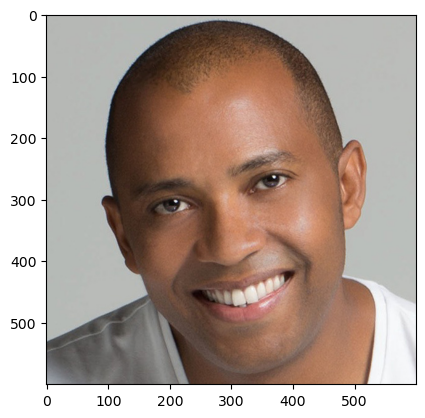

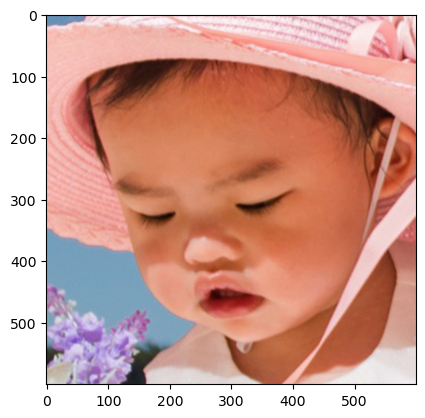

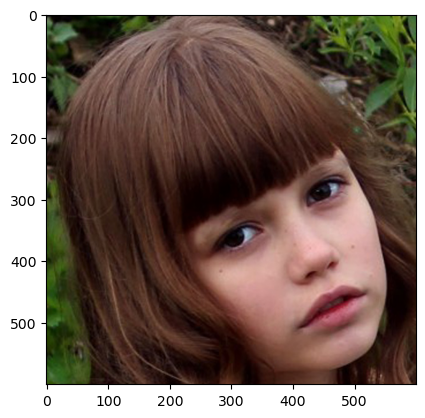

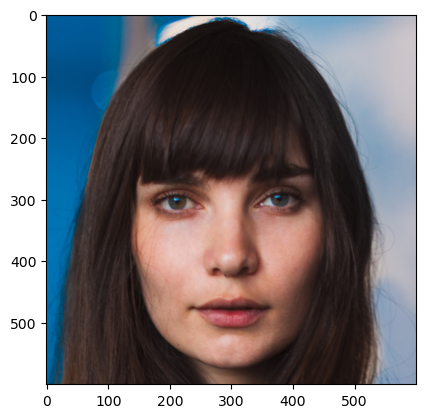

In [42]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

for i in range(train_features.shape[0]):
    img = train_features[i].squeeze().permute((1, 2, 0))
    plt.imshow(img, cmap="gray")
    plt.show()


In [44]:
class CNNmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)
 
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
 
        self.flat = nn.Flatten()
 
        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)
 
        self.fc4 = nn.Linear(512, 10)
 
    def forward(self, x):
        # input 3x32x32, output 32x32x32
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # input 32x16x16, output 8192
        x = self.flat(x)
        # input 8192, output 512
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        # input 512, output 10
        x = self.fc4(x)
        return x
 

loss_fn = nn.MSE()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

AttributeError: module 'torch.nn' has no attribute 'MSE'